In [1]:
import mne
import os
import glob

# Load ALL resting state files from raw directory
raw_dir = os.path.join('..', '..', 'raw')

# Find all files with "RestingState" in the name
resting_files = glob.glob(os.path.join(raw_dir, "*RestingState*.set"))

print(f"Found {len(resting_files)} resting state files:")
for f in resting_files:
    print(f"  - {os.path.basename(f)}")

# Load all files
raw_list = []
for file_path in resting_files:
    print(f"\nLoading {os.path.basename(file_path)}...")
    raw = mne.io.read_raw_eeglab(file_path, preload=True)
    raw_list.append(raw)
    print(f"  ✓ Channels: {len(raw.ch_names)}, Duration: {raw.times[-1]:.1f}s")

print(f"\n✓ Loaded {len(raw_list)} resting state recordings")

# Concatenate all recordings if multiple files exist
if len(raw_list) > 1:
    raw = mne.concatenate_raws(raw_list)
    print(f"✓ Combined into one continuous recording: {raw.times[-1]:.1f}s total")
else:
    raw = raw_list[0]

n_channels = len(raw.info['ch_names'])
print(f"\nFinal data:")
print(f"  Channels: {n_channels}")
print(f"  Sampling rate: {raw.info['sfreq']} Hz")
print(f"  Total duration: {raw.times[-1]:.1f} seconds")

Found 5 resting state files:
  - sub-NDARAA396TWZ_task-RestingState_eeg.set
  - sub-NDARAA773LUW_task-RestingState_eeg.set
  - sub-NDARAB674LNB_task-RestingState_eeg.set
  - sub-NDARAC688ZM5_task-RestingState_eeg.set
  - sub-NDARAC923GPW_task-RestingState_eeg.set

Loading sub-NDARAA396TWZ_task-RestingState_eeg.set...
  ✓ Channels: 129, Duration: 411.7s

Loading sub-NDARAA773LUW_task-RestingState_eeg.set...
  ✓ Channels: 129, Duration: 411.7s

Loading sub-NDARAA773LUW_task-RestingState_eeg.set...


C:\Users\JINQI\AppData\Local\Temp\ipykernel_41716\327963529.py:19: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


  ✓ Channels: 129, Duration: 357.7s

Loading sub-NDARAB674LNB_task-RestingState_eeg.set...


C:\Users\JINQI\AppData\Local\Temp\ipykernel_41716\327963529.py:19: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


  ✓ Channels: 129, Duration: 350.0s

Loading sub-NDARAC688ZM5_task-RestingState_eeg.set...


C:\Users\JINQI\AppData\Local\Temp\ipykernel_41716\327963529.py:19: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


  ✓ Channels: 129, Duration: 320.5s

Loading sub-NDARAC923GPW_task-RestingState_eeg.set...


C:\Users\JINQI\AppData\Local\Temp\ipykernel_41716\327963529.py:19: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = mne.io.read_raw_eeglab(file_path, preload=True)


  ✓ Channels: 129, Duration: 317.1s

✓ Loaded 5 resting state recordings
✓ Combined into one continuous recording: 1757.0s total

Final data:
  Channels: 129
  Sampling rate: 500.0 Hz
  Total duration: 1757.0 seconds
✓ Combined into one continuous recording: 1757.0s total

Final data:
  Channels: 129
  Sampling rate: 500.0 Hz
  Total duration: 1757.0 seconds


In [2]:
# low pass filter
raw = [r.filter(l_freq=1, h_freq=45, fir_design='firwin') for r in raw_list]

Filtering raw data in 5 contiguous segments
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 1651 samples (3.302 s)

Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.

In [3]:
from asrpy import ASR

for r in raw:
    asr = ASR(sfreq=r.info['sfreq'], cutoff=15)
    asr.fit(r)

C:\Users\JINQI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\asrpy\asr_utils.py:124: RuntimeWarning: divide by zero encountered in divide
  cols = nbins / newX[mcurr]
C:\Users\JINQI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\asrpy\asr_utils.py:125: RuntimeWarning: invalid value encountered in multiply
  H = newX[:m] * cols
C:\Users\JINQI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\asrpy\asr.py:750: RuntimeWarning: invalid value encountered in divide
  wz[ichan] = (Y - mu) / sig
C:\Users\JINQI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\asrpy\asr.py:440: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  M = linalg

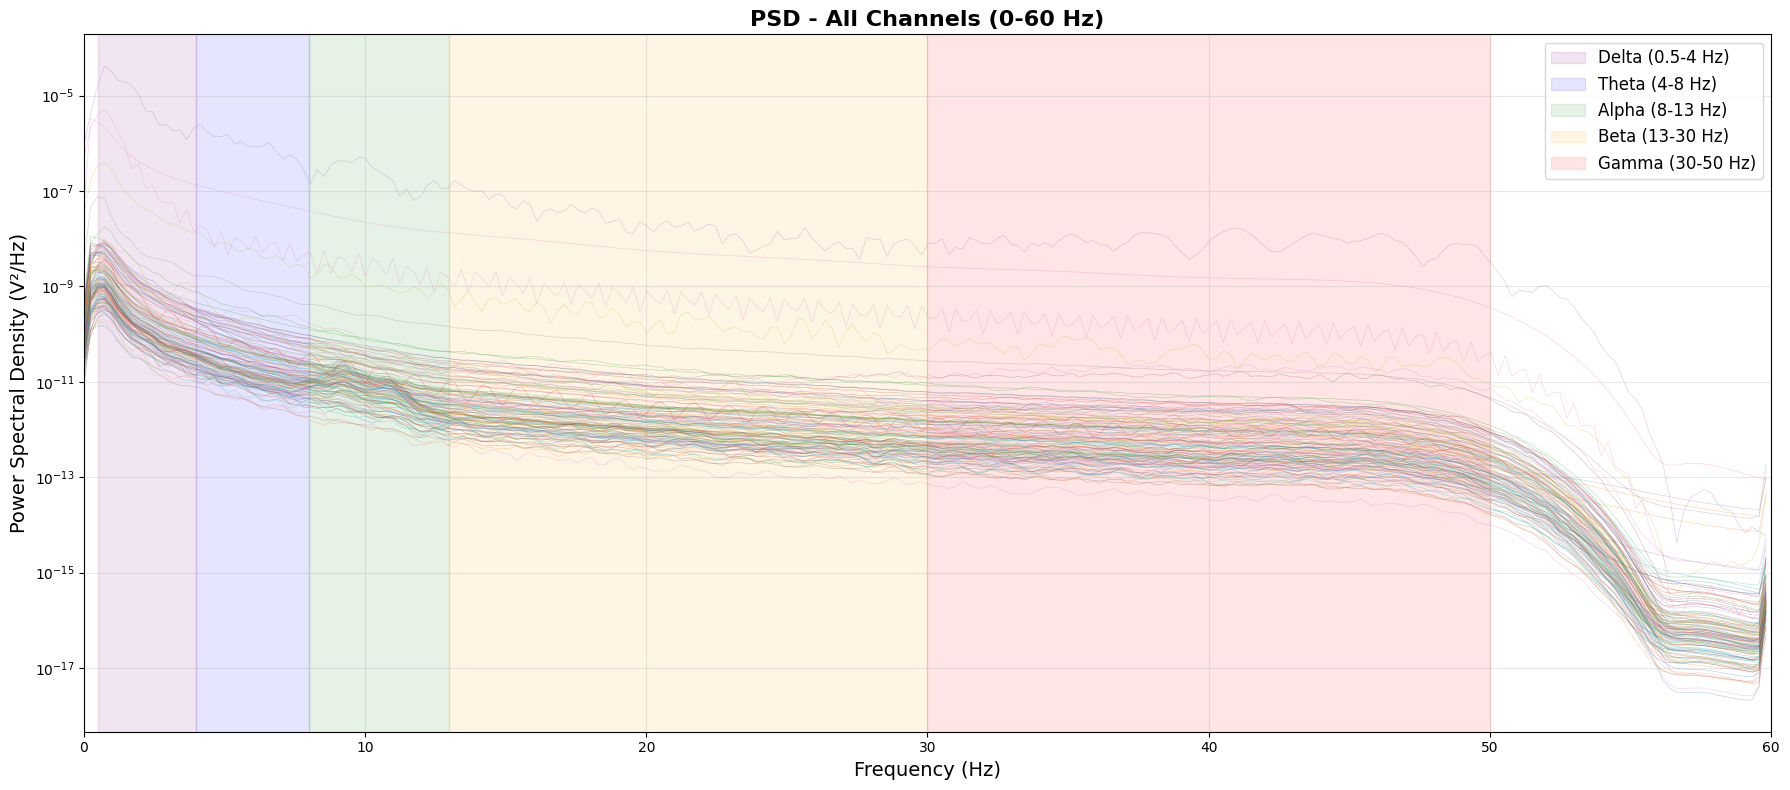

In [5]:
from scipy import signal as sp_signal
import matplotlib.pyplot as plt
import numpy as np

# Get data
data = raw[0].get_data()

# Create LARGE figure
fig, ax = plt.subplots(figsize=(18, 8))  # Super wide and tall


# Compute and plot PSD for all channels
for i, ch_name in enumerate(raw[0].ch_names):
    freqs, psd = sp_signal.welch(data[i], fs=raw[0].info['sfreq'], nperseg=2048)
    
    # Only plot frequencies 0-60 Hz with values > 0
    mask = (freqs >= 0) & (freqs <= 60) & (psd > 0)
    ax.semilogy(freqs[mask], psd[mask], alpha=0.3, linewidth=0.5)

# Make it readable
ax.set_xlabel('Frequency (Hz)', fontsize=14)
ax.set_ylabel('Power Spectral Density (V²/Hz)', fontsize=14)
ax.set_title('PSD - All Channels (0-60 Hz)', fontsize=16, fontweight='bold')
ax.set_xlim(0, 60)
ax.grid(True, alpha=0.3)

# Add brain wave band markers
ax.axvspan(0.5, 4, alpha=0.1, color='purple', label='Delta (0.5-4 Hz)')
ax.axvspan(4, 8, alpha=0.1, color='blue', label='Theta (4-8 Hz)')
ax.axvspan(8, 13, alpha=0.1, color='green', label='Alpha (8-13 Hz)')
ax.axvspan(13, 30, alpha=0.1, color='orange', label='Beta (13-30 Hz)')
ax.axvspan(30, 50, alpha=0.1, color='red', label='Gamma (30-50 Hz)')

ax.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()

In [6]:
# Save cleaned data in different formats

# Ensure the processed directory exists to avoid FileNotFoundError
processed_dir = os.path.join('..', '..', 'processed')
os.makedirs(processed_dir, exist_ok=True)

# Option 1: Save as .fif (MNE's native format - RECOMMENDED)
for i, r in enumerate(raw):
    output_path_fif = os.path.join(processed_dir, f'resting_state_cleaned_{i}.fif')
    r.save(output_path_fif, overwrite=True)
    print(f"✓ Saved as FIF: {output_path_fif}")

# Option 2: Save as .set (EEGLAB format)
for i, r in enumerate(raw):
    output_path_set = os.path.join(processed_dir, f'resting_state_cleaned_{i}.set')
    mne.export.export_raw(output_path_set, r, fmt='eeglab', overwrite=True)
    print(f"✓ Saved as SET: {output_path_set}")

# Option 3: Save as NumPy array (for GAN or other Python projects)
for i , r in enumerate(raw):
    output_path_npy = os.path.join(processed_dir, f'resting_state_cleaned_{i}.npy')
    np.save(output_path_npy, r.get_data())
    print(f"✓ Saved as NPY: {output_path_npy}")

# Also save channel names and sampling frequency
for i, r in enumerate(raw):

    metadata = {
        'ch_names': r.ch_names,
        'sfreq': r.info['sfreq'],
        'n_channels': len(r.ch_names),
        'n_times': r.n_times
    }
    metadata_path = os.path.join(processed_dir, f'resting_state_metadata{i}.npy')
    np.save(metadata_path, metadata)
    print(f"✓ Saved metadata: {metadata_path}")

print("\n" + "="*60)
print("SAVED CLEANED DATA")
print("="*60)
print(f"Channels: {len(raw[0].ch_names)}")
print(f"Sampling rate: {raw[0].info['sfreq']} Hz")
print(f"Duration: {raw[0].times[-1]:.1f} seconds")
print(f"Data shape: {raw[0].get_data().shape}")
print("="*60)

Writing c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_0.fif


C:\Users\JINQI\AppData\Local\Temp\ipykernel_41716\4087667168.py:10: RuntimeWarning: This filename (c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  r.save(output_path_fif, overwrite=True)


Closing c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_0.fif
[done]
✓ Saved as FIF: ..\..\processed\resting_state_cleaned_0.fif
Writing c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_1.fif
[done]
✓ Saved as FIF: ..\..\processed\resting_state_cleaned_0.fif
Writing c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_1.fif
Closing c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_1.fif
Closing c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_1.fif


C:\Users\JINQI\AppData\Local\Temp\ipykernel_41716\4087667168.py:10: RuntimeWarning: This filename (c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  r.save(output_path_fif, overwrite=True)


[done]
✓ Saved as FIF: ..\..\processed\resting_state_cleaned_1.fif
Writing c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_2.fif
✓ Saved as FIF: ..\..\processed\resting_state_cleaned_1.fif
Writing c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_2.fif
Closing c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_2.fif
Closing c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_2.fif


C:\Users\JINQI\AppData\Local\Temp\ipykernel_41716\4087667168.py:10: RuntimeWarning: This filename (c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  r.save(output_path_fif, overwrite=True)


[done]
✓ Saved as FIF: ..\..\processed\resting_state_cleaned_2.fif
Writing c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_3.fif
✓ Saved as FIF: ..\..\processed\resting_state_cleaned_2.fif
Writing c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_3.fif
Closing c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_3.fif
[done]
✓ Saved as FIF: ..\..\processed\resting_state_cleaned_3.fif
Writing c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_4.fif
Closing c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_3.fif
[done]
✓ Saved as FIF: ..\..\processed\resting_state_cleaned_3.fif
Writing c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_4.fif


C:\Users\JINQI\AppData\Local\Temp\ipykernel_41716\4087667168.py:10: RuntimeWarning: This filename (c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  r.save(output_path_fif, overwrite=True)
C:\Users\JINQI\AppData\Local\Temp\ipykernel_41716\4087667168.py:10: RuntimeWarning: This filename (c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  r.save(output_path_fif, overwrite=True)


Closing c:\Users\JINQI\Coursework\DATA495\notebooks\joseph-nb\..\..\processed\resting_state_cleaned_4.fif
[done]
[done]
✓ Saved as FIF: ..\..\processed\resting_state_cleaned_4.fif
✓ Saved as FIF: ..\..\processed\resting_state_cleaned_4.fif
✓ Saved as SET: ..\..\processed\resting_state_cleaned_0.set
✓ Saved as SET: ..\..\processed\resting_state_cleaned_0.set
✓ Saved as SET: ..\..\processed\resting_state_cleaned_1.set
✓ Saved as SET: ..\..\processed\resting_state_cleaned_1.set
✓ Saved as SET: ..\..\processed\resting_state_cleaned_2.set
✓ Saved as SET: ..\..\processed\resting_state_cleaned_2.set
✓ Saved as SET: ..\..\processed\resting_state_cleaned_3.set
✓ Saved as SET: ..\..\processed\resting_state_cleaned_3.set
✓ Saved as SET: ..\..\processed\resting_state_cleaned_4.set
✓ Saved as SET: ..\..\processed\resting_state_cleaned_4.set
✓ Saved as NPY: ..\..\processed\resting_state_cleaned_0.npy
✓ Saved as NPY: ..\..\processed\resting_state_cleaned_1.npy
✓ Saved as NPY: ..\..\processed\resting_

## 📂 How to Load Cleaned Data Later

```python
# Load FIF format (RECOMMENDED)
import mne
raw_cleaned = mne.io.read_raw_fif('../../processed/resting_state_cleaned.fif', preload=True)

# Load NumPy array
import numpy as np
data = np.load('../../processed/resting_state_cleaned.npy')
metadata = np.load('../../processed/resting_state_metadata.npy', allow_pickle=True).item()

# Load EEGLAB format
raw_cleaned = mne.io.read_raw_eeglab('../../processed/resting_state_cleaned.set', preload=True)
```

**Which format to use:**
- **`.fif`** ← Use for MNE Python workflows (keeps all metadata) ✓
- **`.npy`** ← Use for GAN or ML projects (just the data)
- **`.set`** ← Use if sharing with EEGLAB users

**Note:** This now includes ALL resting state files found in the raw directory, concatenated together for maximum data!